#Introduction

This notebook performs the analysis of the climate change model in lecture 14 of NANO114.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Some initial imports

from __future__ import division
import matplotlib.pyplot as plt
import matplotlib as mpl
import prettyplotlib as ppl
import brewer2mpl
import numpy as np
import math
from pandas import read_table, Series, DataFrame

%matplotlib inline

# Here, we customize the various matplotlib parameters for font sizes and define a color scheme.
# As mentioned in the lecture, the typical defaults in most software are not optimal from a
# data presentation point of view. You need to work hard at selecting these parameters to ensure
# an effective data presentation.
colors = brewer2mpl.get_map('Set1', 'qualitative', 3).mpl_colors
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 24
mpl.rcParams['axes.labelsize'] = 24 
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

In [3]:
# Loading the data. This was downloaded from NASA's website with some minimal preprocessign
co2 = read_table("CO2.txt", sep="\s+")
temps = read_table("Temperatures.txt", sep="\s+")

co2['decade'] = Series(np.floor(co2['year']/10) * 10, index=co2.index)
temps['decade'] = Series(np.floor(temps['Year']/10) * 10, index=temps.index)

## Plotting CO2 vs Temperature on an Annual Basis

In this section, we plot the average global temperature (in NASA, these were reported as differences from the average of 1951-1980 temperatures) versus CO2 levels in parts per million (ppm). Even from the scatter plot, we can see that there is a clear relationship between CO2 levels and global temperatures.

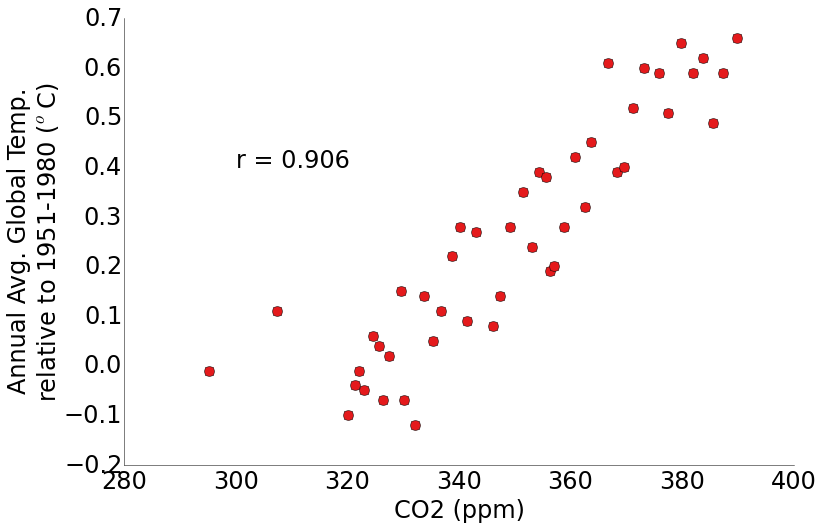

In [6]:
# Plot for 1965-2010. Previous data is not that reliable.

co2_yr = co2.groupby('year')['average'].mean()
co2_series = co2_yr.loc[1965:2010]
temp_data = temps.set_index('Year')
temp_series = temp_data.loc[1965:2010]["J-D"]
plt.figure(figsize=(12,8))
ppl.plot(co2_series, temp_series / 100, 'o', color=colors[0], markersize=10)
plt.ylabel("Annual Avg. Global Temp.\nrelative to 1951-1980 ($^o$C)")
plt.xlabel("CO2 (ppm)")
annotation = plt.annotate("r = %.3f" % temp_series.corr(co2_series), xy=(300, 0.4), fontsize=24)

## CO2 vs Temperature by Decade

For the purposes of illustration, we will now use data that is averaged by decade. That reduces the number of data points, which makes it far easier to work through the numbers by hand in a lecture. Here are the numbers by decade.

In [20]:
co2_decade = co2.groupby('decade')['average'].mean()
co2_series = co2_decade
temp_decade = temps.groupby('decade')['J-D'].mean()
temp_series = temp_decade / 100
df = DataFrame({"CO2 in ppm (X)": co2_series, "Avg. Temp. Diff. (Y)": temp_series})
print df

        Avg. Temp. Diff. (Y)  CO2 in ppm (X)
decade                                      
1950                  -0.044        277.9255
1960                  -0.020        309.7650
1970                   0.024        327.2535
1980                   0.206        341.7808
1990                   0.363        360.4253
2000                   0.556        378.5556
2010                   0.660        394.1611


Let us now compute the various products and sums needed.

In [22]:
df["X^2"] = df["CO2 in ppm (X)"] ** 2
df["Y^2"] = df["Avg. Temp. Diff. (Y)"] ** 2
df["XY"] = df["CO2 in ppm (X)"] * df["Avg. Temp. Diff. (Y)"]
import pandas
pandas.set_option('display.precision', 5)
print df

        Avg. Temp. Diff. (Y)  CO2 in ppm (X)          X^2     Y^2        XY
decade                                                                     
1950                  -0.044        277.9255   77242.5583  0.0019  -12.2287
1960                  -0.020        309.7650   95954.3552  0.0004   -6.1953
1970                   0.024        327.2535  107094.8533  0.0006    7.8541
1980                   0.206        341.7808  116814.1380  0.0424   70.4069
1990                   0.363        360.4253  129906.3608  0.1318  130.8344
2000                   0.556        378.5556  143304.3297  0.3091  210.4769
2010                   0.660        394.1611  155363.0102  0.4356  260.1464


We can now compute our various sums of squares.

In [28]:
SS_x = df["X^2"].sum() - df["CO2 in ppm (X)"].sum() ** 2 / 7
SS_y = df["Y^2"].sum() - df["Avg. Temp. Diff. (Y)"].sum() ** 2 / 7
SP = df["XY"].sum() - df["CO2 in ppm (X)"].sum() * df["Avg. Temp. Diff. (Y)"].sum() / 7

print "SS_x = %.3f" % (SS_x)
print "SS_y = %.3f" % (SS_y)
print "SP = %.3f" % (SP)

SS_x = 9756.295
SS_y = 0.487
SP = 65.535


Finally, we then have the correlation coefficient as $$r = \frac{SP}{\sqrt{SS_x SS_y}}$$

In [33]:
print "r = %.3f" % (SP / np.sqrt(SS_x * SS_y))

r = 0.951


Using the Python Data Analysis (pandas) library, we can also do a ordinary least squares regression and print out the associated statistics.

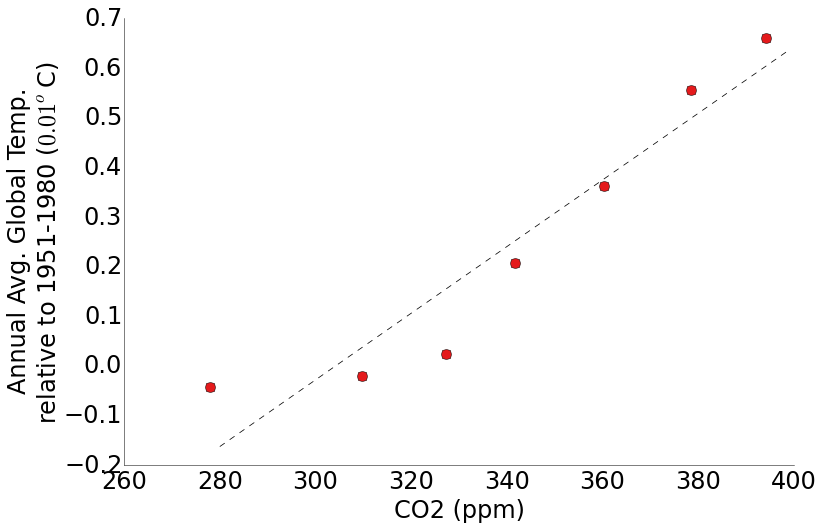


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         7
Number of Degrees of Freedom:   2

R-squared:         0.9042
Adj R-squared:     0.8850

Rmse:              0.0966

F-stat (1, 5):    47.1934, p-value:     0.0010

Degrees of Freedom: model 1, resid 5

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0067     0.0010       6.87     0.0010     0.0048     0.0086
     intercept    -2.0440     0.3358      -6.09     0.0017    -2.7022    -1.3858
---------------------------------End of Summary---------------------------------



In [36]:
plt.figure(figsize=(12,8))
ppl.plot(co2_series, temp_series, 'o', color=colors[0], markersize=10)
plt.ylabel("Annual Avg. Global Temp.\nrelative to 1951-1980 ($0.01 ^o$C)")
plt.xlabel("CO2 (ppm)")
#plt.annotate("r = %.3f" % temp_series.corr(co2_series), xy=(330, 0.4), fontsize=24)
from pandas import ols
model = ols(y=temp_series, x=co2_series)
x = np.arange(280, 400, 1)
ppl.plot(x, model.beta['x'] * x + model.beta['intercept'], 'k--')
plt.show()
print model